#### Time series resampling

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
## importing starbucks data
df = pd.read_csv("data/starbucks.csv",index_col='Date',parse_dates=True)

In [6]:
df.head(10)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
2015-01-09,37.2361,27556706
2015-01-12,37.4415,10021486
2015-01-13,37.7401,11040702
2015-01-14,37.5301,9295084


In [5]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

**The data seems to be daily data**

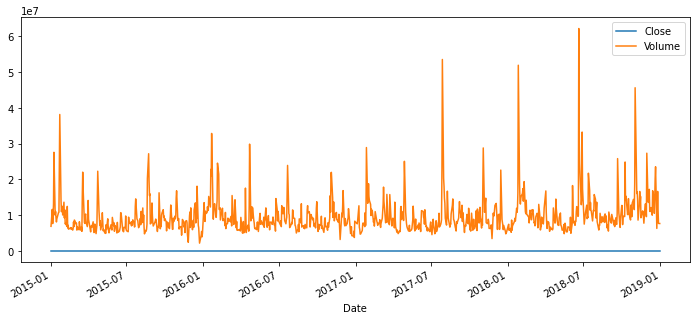

In [8]:
df.plot(figsize=(12,5));

In [14]:
## resampling the data to the year end data
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


#### Time series shifting

In [15]:
## positive values of integer shifts down the data
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [16]:
## negative value of integer shifts up the data
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [18]:
## shifting based on the time series frequency code
## let's use month end frequency
df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [20]:
## now using month start freqency
df.shift(periods=1,freq='MS').head()

,Close,Volume
Date,,
2015-02-01,38.0061,6906098
2015-02-01,37.2781,11623796
2015-02-01,36.9748,7664340
2015-02-01,37.8848,9732554
2015-02-01,38.4961,13170548


#### Time series rolling

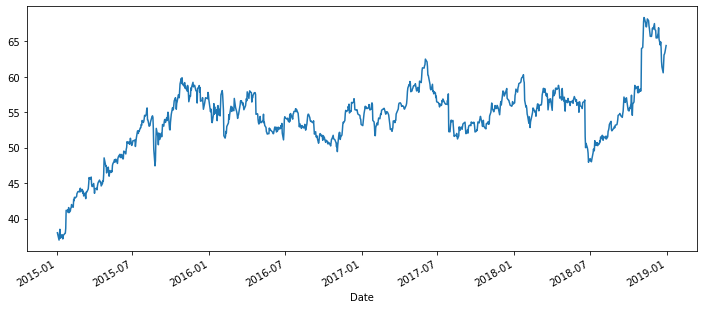

In [22]:
df['Close'].plot(figsize=(12,5));

In [24]:
## rolling using the window of 7
df.rolling(window=7).mean().head(12)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


**Rolling basically smoothens out the plot of data and the window increases, the plot becomes more and more smooth**

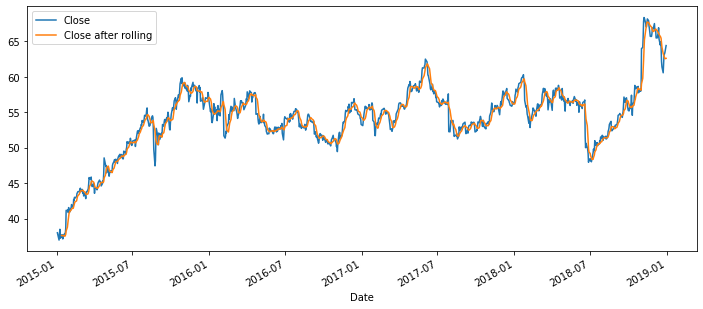

In [27]:
df['Close'].plot(figsize=(12,5),legend=True)
df['Close'].rolling(window=7).mean().rename('Close after rolling').plot(legend=True);

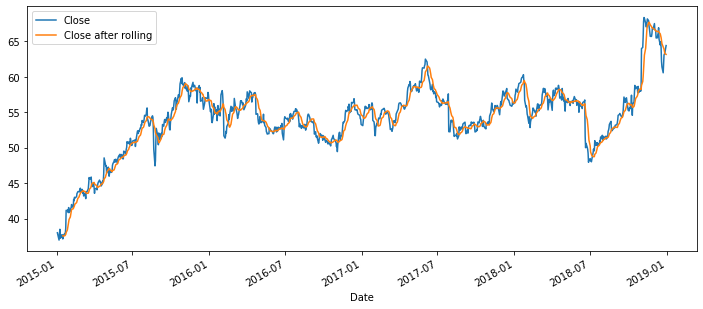

In [28]:
df['Close'].plot(figsize=(12,5),legend=True)
df['Close'].rolling(window=10).mean().rename('Close after rolling').plot(legend=True);

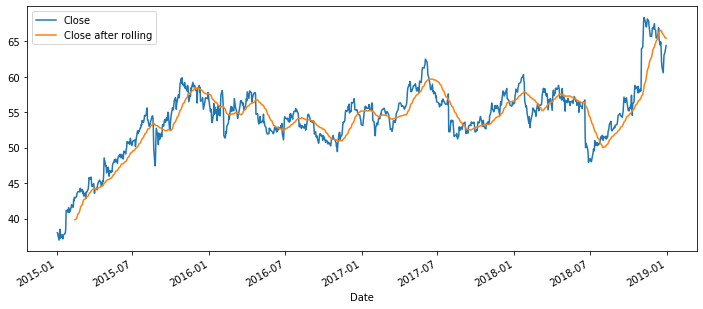

In [30]:
df['Close'].plot(figsize=(12,5),legend=True)
df['Close'].rolling(window=30).mean().rename('Close after rolling').plot(legend=True);

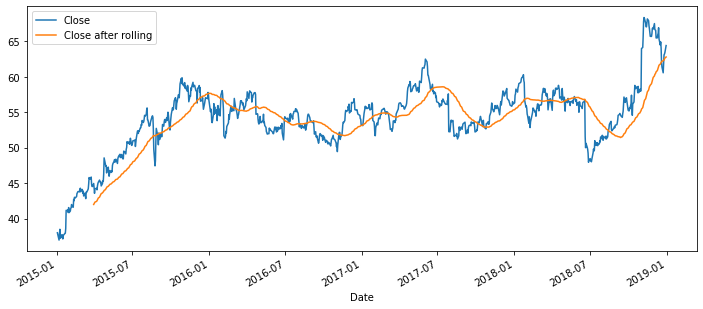

In [31]:
df['Close'].plot(figsize=(12,5),legend=True)
df['Close'].rolling(window=60).mean().rename('Close after rolling').plot(legend=True);

#### Time series expanding

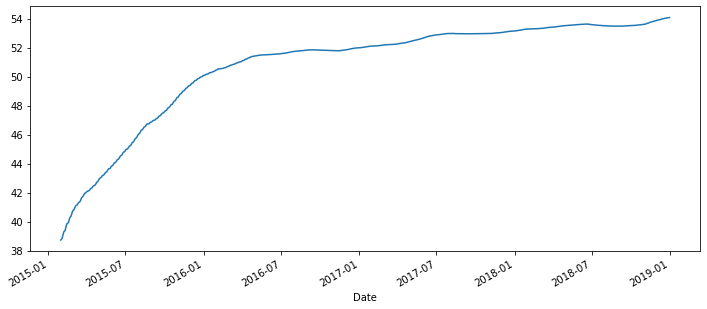

In [34]:
df['Close'].expanding(min_periods=20).mean().plot(figsize=(12,5));